## Cervical cancer risk prediction

__Introduction:__ 

Worldwide, cervical cancer is both the fourth-most common cause of cancer and the fourth-most common cause of death from cancer in women. In 2012, an estimated 528,000 cases of cervical cancer occurred, with 266,000 deaths.This is about 8% of the total cases and total deaths from cancer. About 70% of cervical cancers occur in developing countries.

__Data Source:__ 

This project will examine data collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela.
<http://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29>
The dataset was obtained from UCI repository and comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).


__Data cleaning:__

First we want to observe the data to see the type and structure of it or whether there are missing values.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('risk_factors_cervical_cancer.csv')

In [6]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

There are some missing values named as '?'. We have to replace '?' with NaN and turn the object type to numeric type.

In [10]:
df_nan = df.replace('?', np.nan)

In [12]:
df_nan = df_nan.apply(pd.to_numeric, errors="ignore")

In [14]:
df_nan.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [17]:
df_nan.isnull().sum()#NaN counts in different columns

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Now we replace NaN with median value for the column.

In [19]:
for col in df_nan.columns:
    df_nan[col] = df_nan[col].fillna(df_nan[col].median())

In [22]:
df_nan.isnull().sum()#check there is no NaN left

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [24]:
df=df_nan

In [26]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,4.0,3.0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,4.0,3.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,4.0,3.0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.80,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


Our data is cleaned. Let's see if we can find something interesting.

__EDA:__

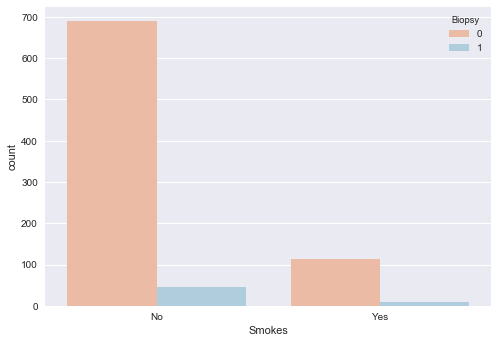

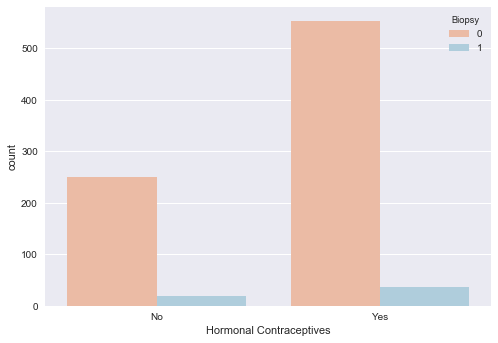

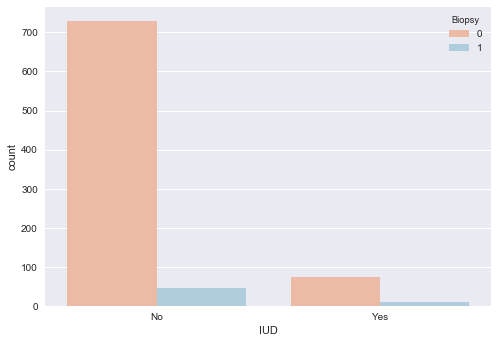

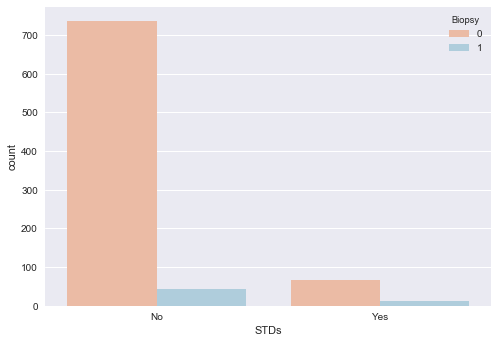

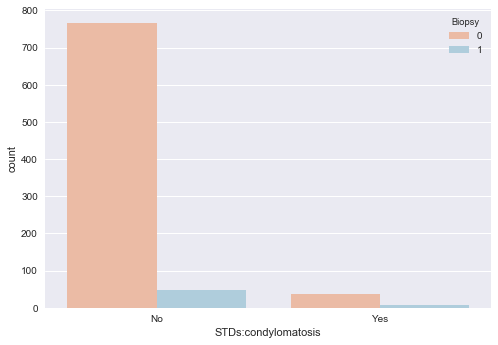

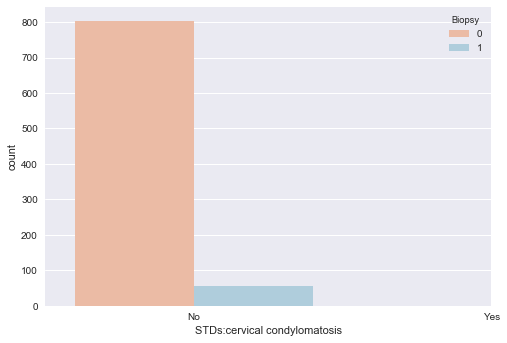

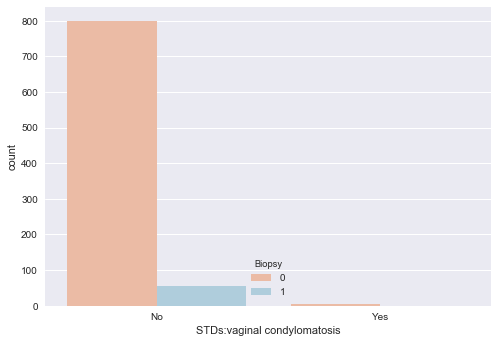

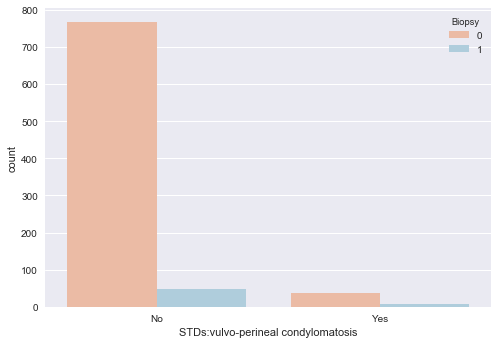

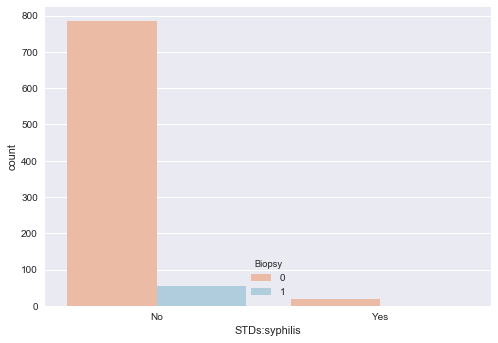

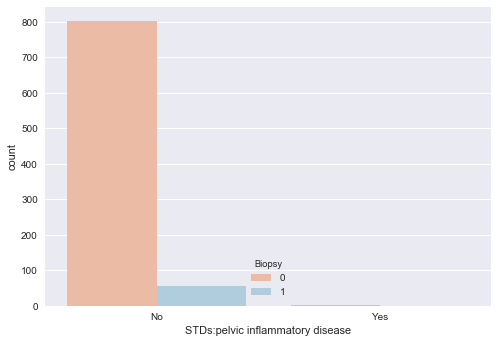

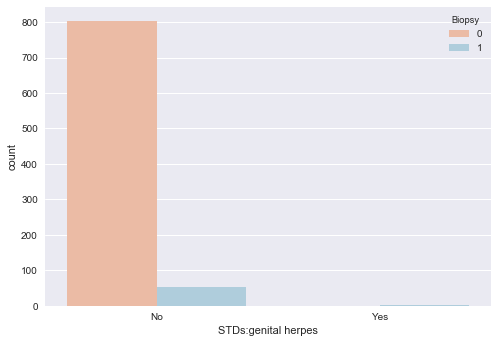

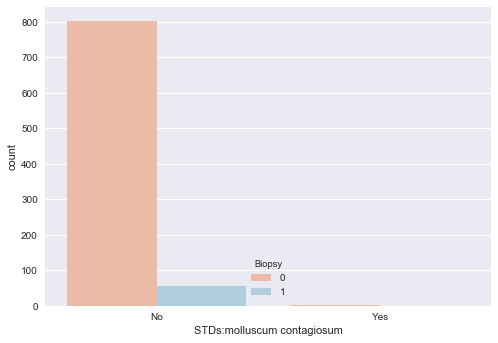

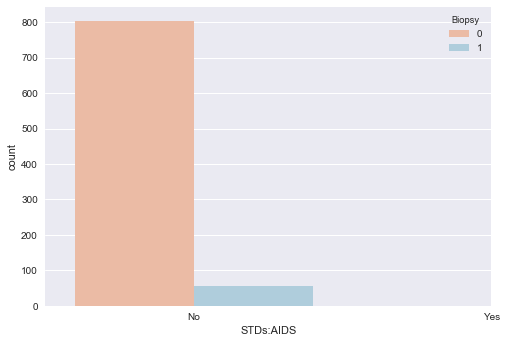

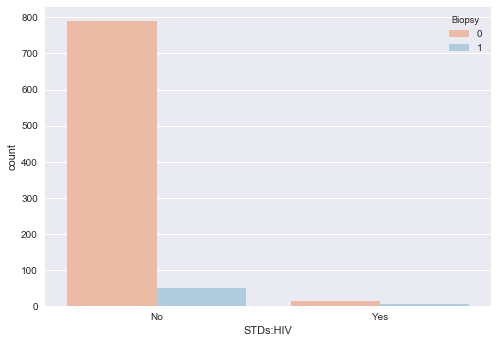

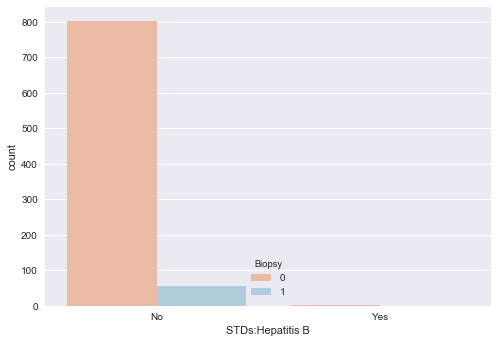

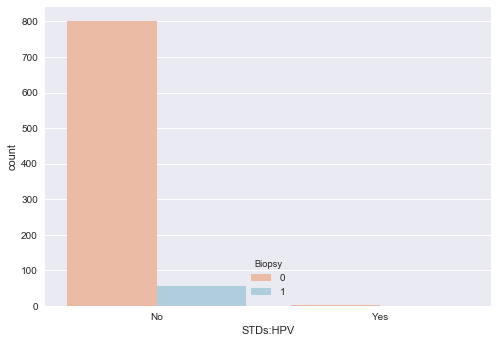

In [46]:
sns.set()
for col in ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV']:
    sns.countplot(x=col, hue='Biopsy', data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

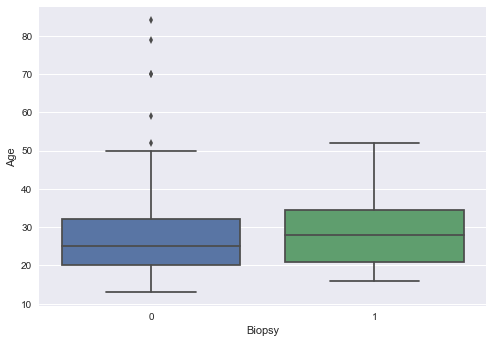

In [49]:
sns.set()
_ = sns.boxplot(x = 'Biopsy', y = 'Age', data = df)
_ = plt.xlabel('Biopsy')
_ = plt.ylabel('Age')
plt.show()

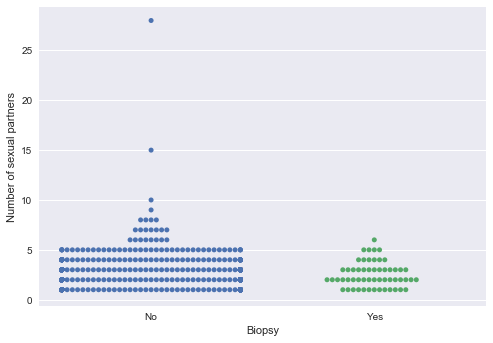

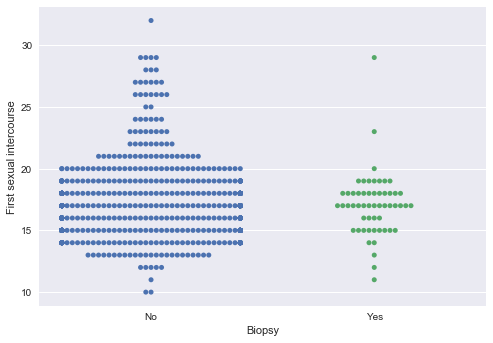

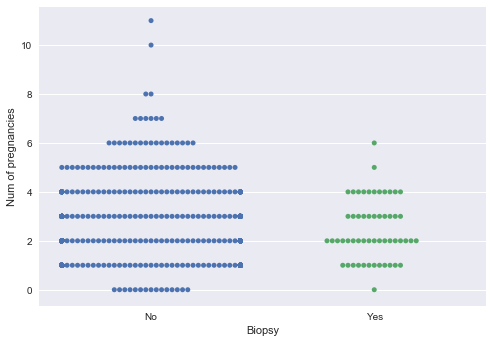

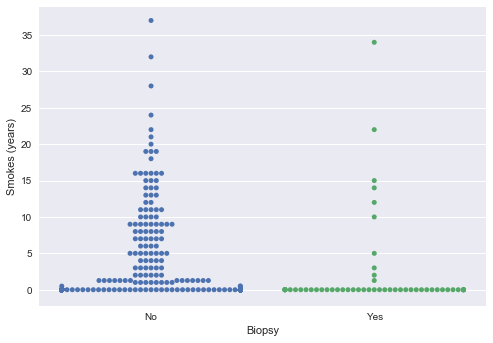

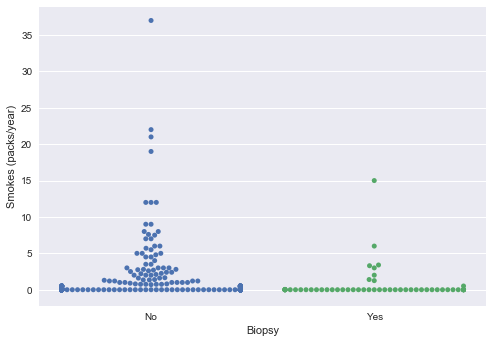

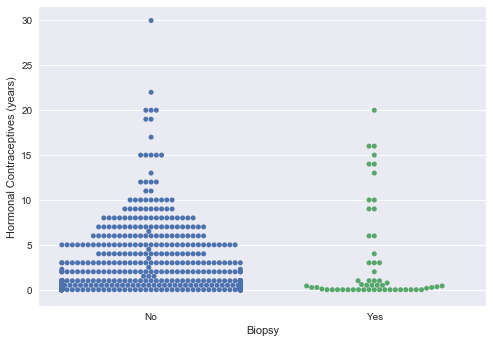

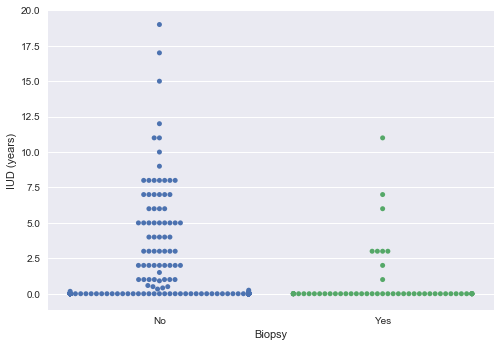

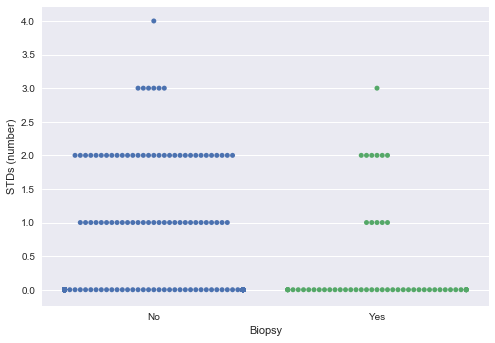

In [42]:
sns.set()
for col in ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)','STDs (number)']:
    _ = sns.swarmplot(x = 'Biopsy', y = col, data = df)
    plt.xticks([0,1], ['No', 'Yes'])
    _ = plt.xlabel('Biopsy')
    _ = plt.ylabel(col)
    plt.show()

As we can see from the plots above the age of most patients with cancer is from 21 to 35. Patients with biopsy(+) have 1 or more pregnancy, first sexual intercourse was under age of 20. From all the patients with IUD a significant percentage is also with biopsy(+), the same is for patients with STDs. Let's see correlation map. 

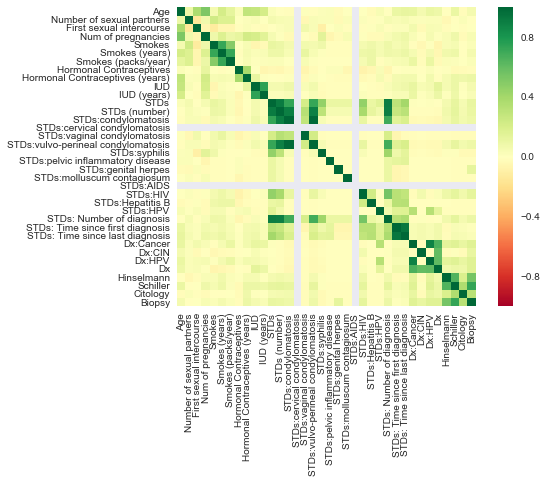

In [43]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [45]:
r_dict = {}
for col in df.columns[1:]:
    corr_mat = np.corrcoef(df[col], df['Biopsy'])
    r = corr_mat[0,1]
    r_dict[col]=r
sorted([(value,key) for (key,value) in r_dict.items()])

C:\Users\wibot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\wibot\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[(-0.038310708317909649, 'STDs:syphilis'),
 (-0.018015252251259439, 'Hormonal Contraceptives'),
 (-0.017911197900583691, 'STDs:vaginal condylomatosis'),
 (-0.012650325130184334, 'STDs:HPV'),
 (-0.0089399102977477628, 'STDs:Hepatitis B'),
 (-0.0089399102977476986, 'STDs:pelvic inflammatory disease'),
 (-0.0089399102977476396, 'STDs:molluscum contagiosum'),
 (-0.00040823475455716143, 'Number of sexual partners'),
 (0.0072587256556861943, 'First sexual intercourse'),
 (0.0086851444277829259, 'STDs: Time since first diagnosis'),
 (0.024486867299405361, 'Smokes (packs/year)'),
 (0.028723759826736597, 'Smokes'),
 (0.029263129992410805, 'STDs: Time since last diagnosis'),
 (0.038176137137442626, 'IUD (years)'),
 (0.040215071854074837, 'Num of pregnancies'),
 (0.059230522949111762, 'IUD'),
 (0.061204228938006498, 'Smokes (years)'),
 (0.090163887229926007, 'STDs:condylomatosis'),
 (0.092548317834005966, 'STDs:vulvo-perineal condylomatosis'),
 (0.094163640258108777, 'Hormonal Contraceptives (yea

'Schiller', 'Hinselmann' and 'Cytology' have the highest correlation with biopsy, which makes sense from medical point of view. We will use only highly correlated columns as features for prediction. 